<a href="https://colab.research.google.com/github/Ruchika004/kidney_disease/blob/main/Kidney_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
sns.set()

In [59]:
!pip install lux

In [60]:
dataset = pd.read_csv("kidney_disease.csv")

In [61]:
dataset.shape

(400, 26)

In [62]:
dataset.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [63]:
dataset.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [64]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [65]:
dataset.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [66]:
dataset.duplicated().sum()

np.int64(0)

In [67]:
dataset.isnull().sum().sum()

np.int64(1009)

In [68]:
dataset.isnull().sum()/len(dataset)*100

,0
id,0.00
age,2.25
bp,3.00
sg,11.75
al,11.50
su,12.25
rbc,38.00
pc,16.25
pcc,1.00
ba,1.00


In [69]:
dataset['classification']=dataset['classification'].apply(lambda x:'ckd' if x=='ckd\t' else x)

In [70]:
df = dataset

In [71]:
for i in df.columns:
  print ("****************", i,"******************")
  print()
  print(set(df[i].tolist()))

**************** id ******************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213,

In [72]:
df['dm']=df['dm'].apply(lambda x:'yes' if x=='\tyes' else x)

In [73]:
df['dm']=df['dm'].apply(lambda x:'no' if x=='\tno' else x)

In [74]:
df['cad']=df['cad'].apply(lambda x:'no' if x=='\tno' else x)

In [75]:
df['pcv'].mode()

,pcv
0,41
1,52


In [76]:
df['pcv']=df['pcv'].apply(lambda x:'52' if x=='\t?' else x)

In [77]:
df['pcv']=df['pcv'].apply(lambda x:'52' if x=='\t43' else x)

In [78]:
df['wc'].mode()

,wc
0,9800


In [79]:
df['wc']=df['wc'].apply(lambda x:'9800' if x=='\t?' else x)

In [80]:
df['wc']=df['wc'].apply(lambda x:'8400' if x=='\t8400' else x)

In [81]:
df['wc']=df['wc'].apply(lambda x:'6200' if x=='\t6200' else x)

In [82]:
for i in df.columns:
  print ("****************", i,"******************")
  print()
  print(set(df[i].tolist()))

**************** id ******************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213,

In [83]:
df['pcv'].isnull().sum()

np.int64(70)

In [84]:
df['pcv']=df['pcv'].fillna(df['pcv'].mode()[0])

In [85]:
df['wc']=df['wc'].fillna(df['wc'].mode()[0])
df['rc']=df['rc'].fillna(df['rc'].mode()[0])

In [86]:
object_columns = df.select_dtypes(include=['object']).columns
print('object columns: ')
print(object_columns)


num_columns = df.select_dtypes(include=['int64','float64']).columns
print('numerical columns: ')
print(num_columns)

object columns: 
Index(['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')
numerical columns: 
Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
       'hemo'],
      dtype='object')


In [87]:
from sklearn.impute import SimpleImputer

imp_mode1=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_mode2=SimpleImputer(missing_values=np.nan, strategy='median')
df_imp1 =pd.DataFrame(imp_mode1.fit_transform(df[object_columns]))
df_imp1.columns=df[object_columns].columns
df_imp2 =pd.DataFrame(imp_mode2.fit_transform(df[num_columns]))
df_imp2.columns=df[num_columns].columns

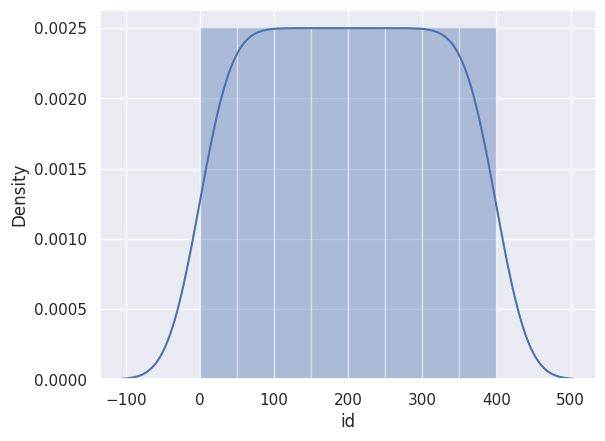

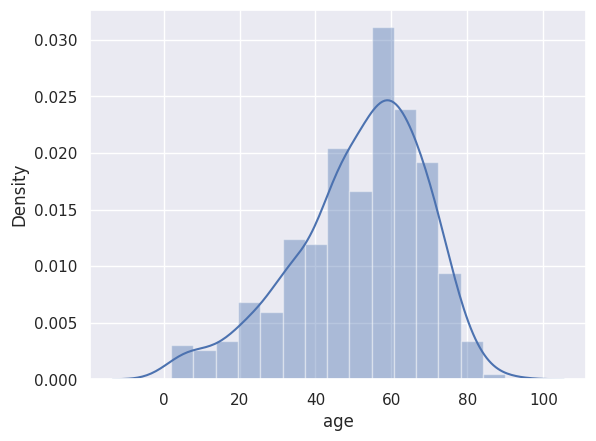

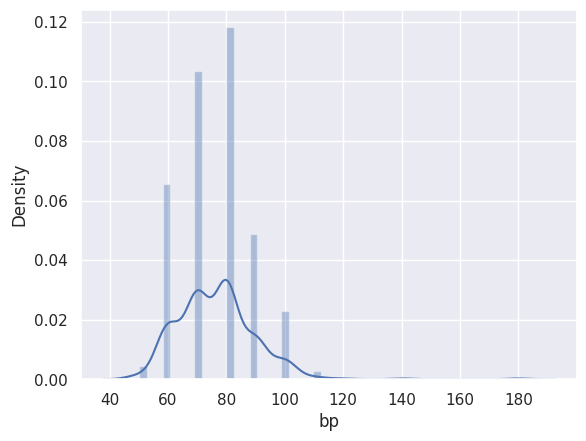

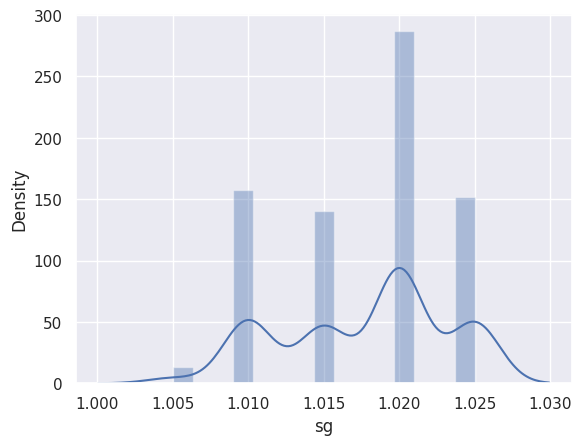

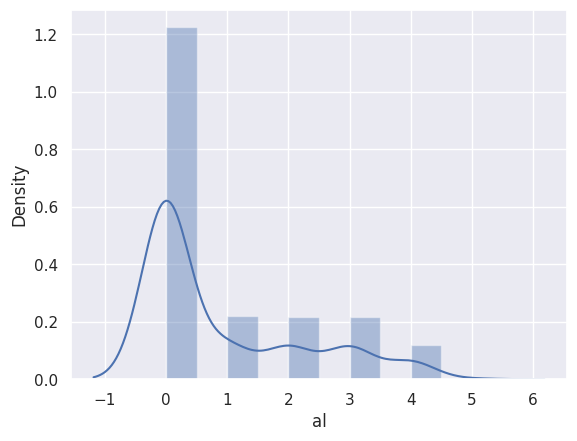

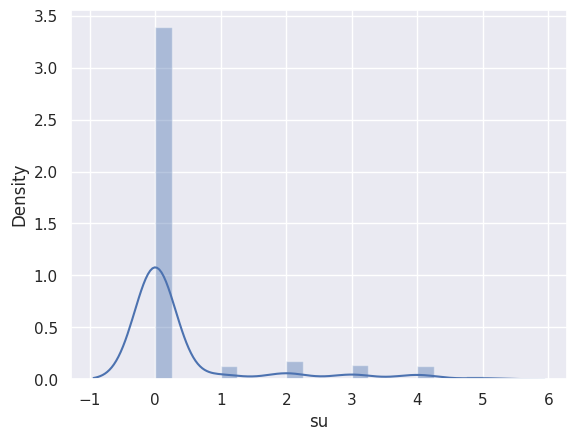

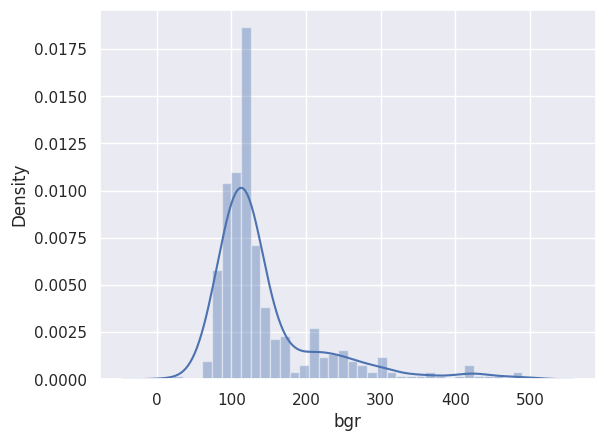

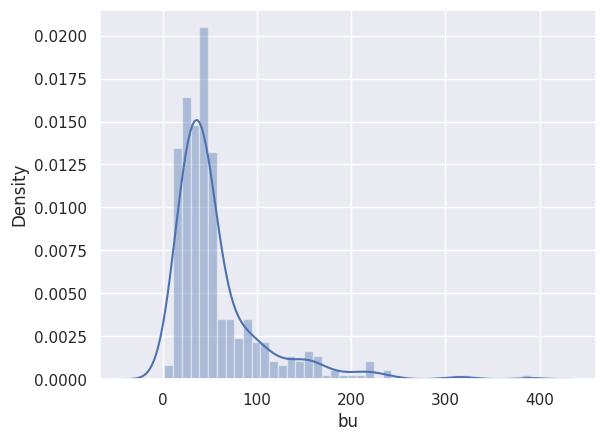

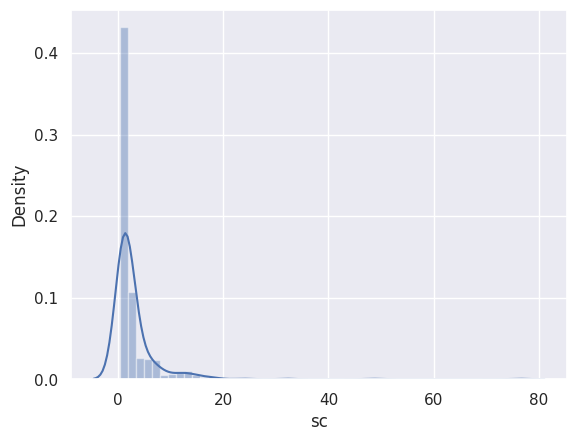

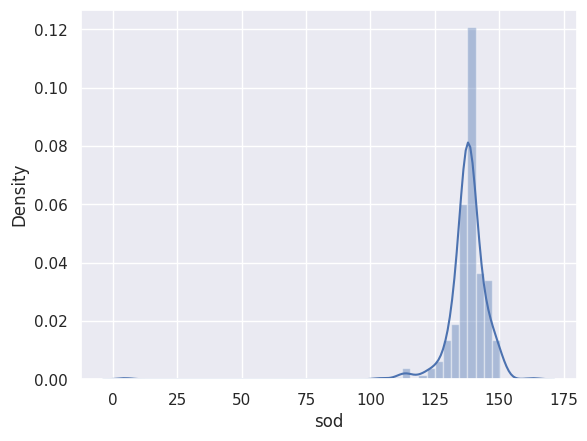

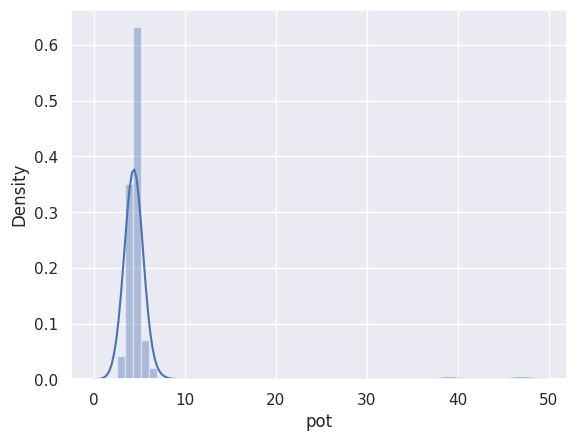

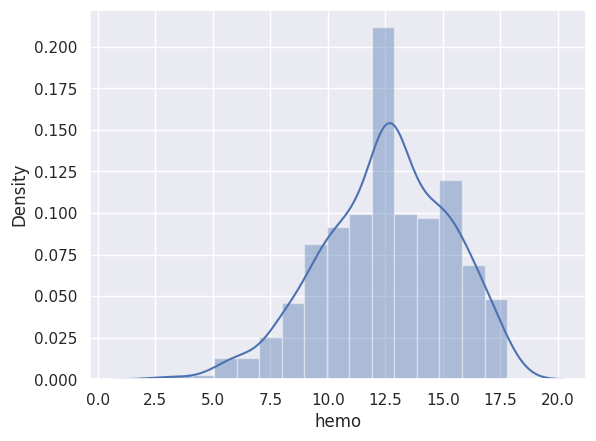

In [88]:
def distplots(col):
	sns.distplot(df_imp2[col])
	plt.show()

for i in list(df_imp2.select_dtypes(exclude=['object']).columns)[0:]:
	distplots(i)

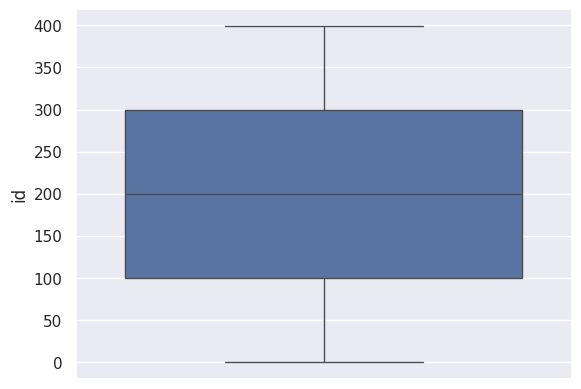

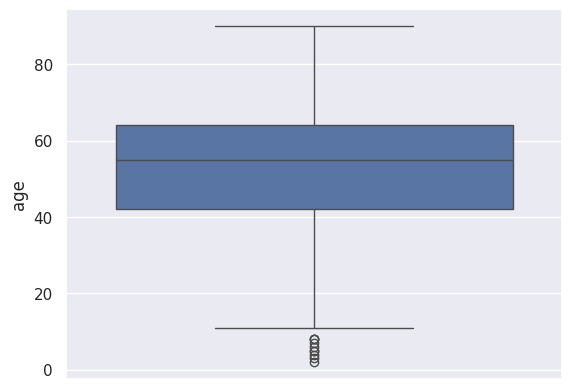

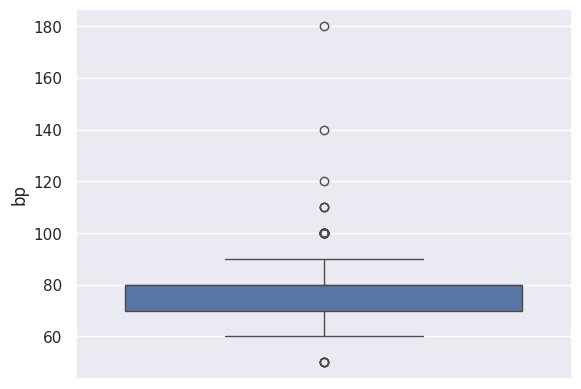

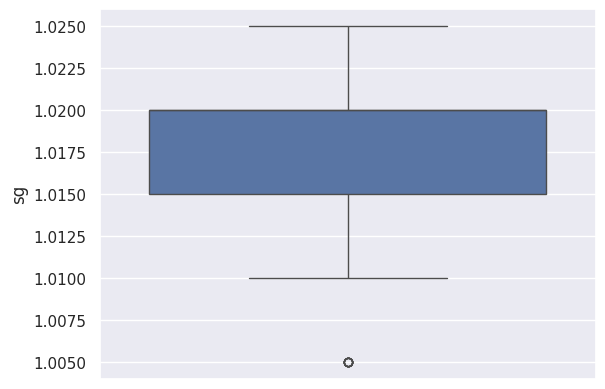

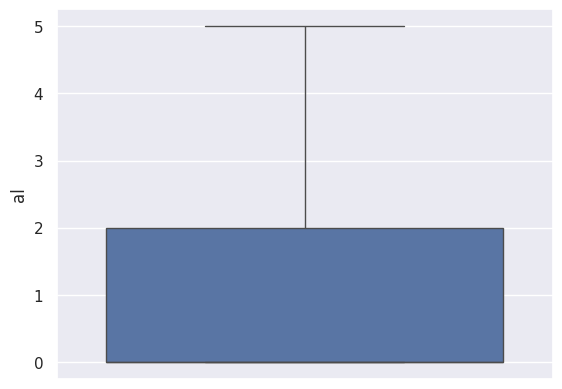

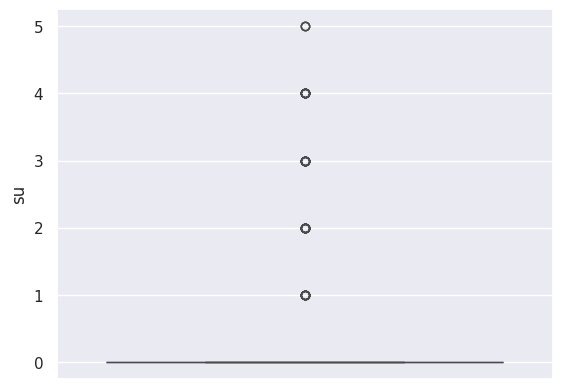

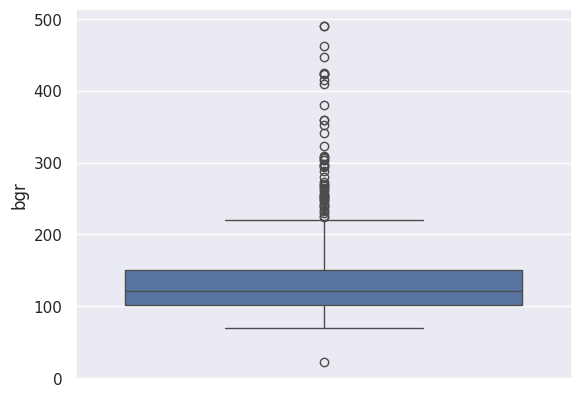

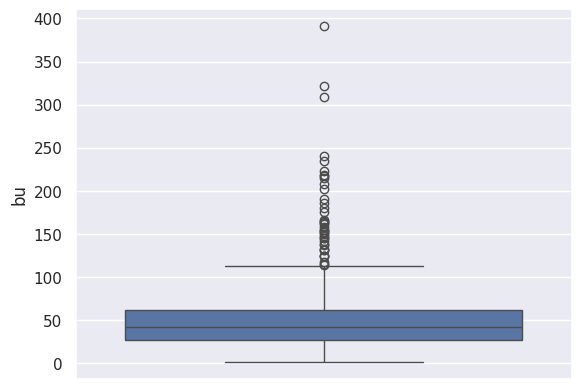

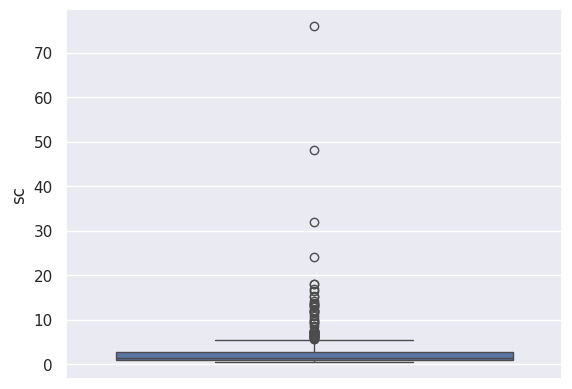

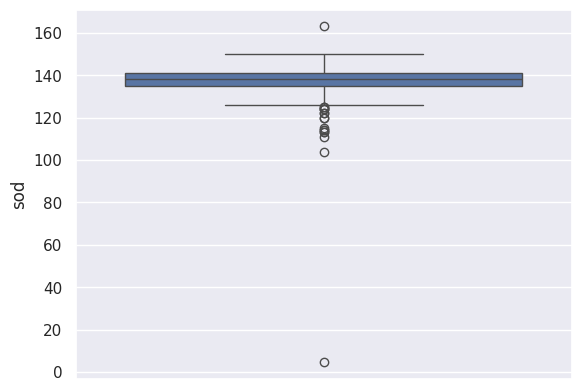

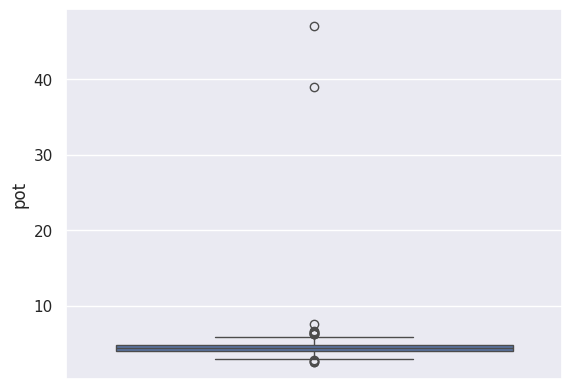

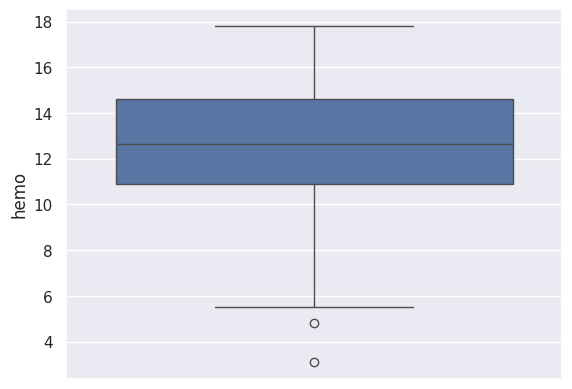

In [89]:
def boxplots(col):
	sns.boxplot(df_imp2[col])
	plt.show()

for i in list(df_imp2.select_dtypes(exclude=['object']).columns)[0:]:
	boxplots(i)

In [90]:
df_table=pd.concat([df_imp1, df_imp2], axis=1)

In [91]:
df_table.shape

(400, 26)

In [92]:
df_table.columns

Index(['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification', 'id', 'age', 'bp', 'sg', 'al',
       'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo'],
      dtype='object')

In [93]:
x = df_table.drop('classification',axis=1)
y = df_table['classification']

In [94]:
x.columns

Index(['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo'],
      dtype='object')

In [95]:
x = x.drop('id', axis=1)

In [96]:
y

,classification
0,ckd
1,ckd
2,ckd
3,ckd
4,ckd
...,...
395,notckd
396,notckd
397,notckd
398,notckd


In [97]:
def classify_features(x):
  categorical = []
  non_categorical = []
  discreate = []
  continous = []
  for column in x.columns:
    if x[column].dtype == 'object':
      if x[column].nunique()<3:
        categorical.append(column)
      else:
        non_categorical.append(column)
    elif x[column].dtype in ["int64", "float64"]:
      if x[column].nunique()<100:
        discreate.append(column)
      else:
        continous.append(column)
  return categorical, non_categorical, discreate, continous



In [98]:
categorical, non_categorical, discreate, continous=classify_features(x)

In [99]:
categorical

['rbc', 'pc', 'pcc', 'ba', 'htn', 'cad', 'appet', 'pe', 'ane']

In [100]:
non_categorical

['pcv', 'wc', 'rc', 'dm']

In [101]:
discreate

['age', 'bp', 'sg', 'al', 'su', 'sc', 'sod', 'pot']

In [102]:
continous

['bgr', 'bu', 'hemo']

In [103]:
for i in categorical:
  print (x[i].value_counts())
  print()

rbc
normal      353
abnormal     47
Name: count, dtype: int64

pc
normal      324
abnormal     76
Name: count, dtype: int64

pcc
notpresent    358
present        42
Name: count, dtype: int64

ba
notpresent    378
present        22
Name: count, dtype: int64

htn
no     253
yes    147
Name: count, dtype: int64

cad
no     366
yes     34
Name: count, dtype: int64

appet
good    318
poor     82
Name: count, dtype: int64

pe
no     324
yes     76
Name: count, dtype: int64

ane
no     340
yes     60
Name: count, dtype: int64



In [104]:
df_dummies = pd.get_dummies(x[categorical],drop_first=True)

In [105]:
df_dummies

,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,True,True,False,False,True,False,False,False,False
1,True,True,False,False,False,False,False,False,False
2,True,True,False,False,False,False,True,False,True
3,True,False,True,False,True,False,True,True,True
4,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
395,True,True,False,False,False,False,False,False,False
396,True,True,False,False,False,False,False,False,False
397,True,True,False,False,False,False,False,False,False
398,True,True,False,False,False,False,False,False,False


In [106]:
df_dummies1 = np.where(df_dummies[0:]==True,1,0)
df_dummies1 = pd.DataFrame(df_dummies1, columns=df_dummies.columns)
df_dummies1

,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,1,1,0,0,1,0,0,0,0
1,1,1,0,0,0,0,0,0,0
2,1,1,0,0,0,0,1,0,1
3,1,0,1,0,1,0,1,1,1
4,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
395,1,1,0,0,0,0,0,0,0
396,1,1,0,0,0,0,0,0,0
397,1,1,0,0,0,0,0,0,0
398,1,1,0,0,0,0,0,0,0


In [107]:
df1 = pd.concat([x.drop(columns=categorical),df_dummies1], axis=1)

In [108]:
df1

,pcv,wc,rc,dm,age,bp,sg,al,su,bgr,...,hemo,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,44,7800,5.2,yes,48.0,80.0,1.020,1.0,0.0,121.0,...,15.4,1,1,0,0,1,0,0,0,0
1,38,6000,5.2,no,7.0,50.0,1.020,4.0,0.0,121.0,...,11.3,1,1,0,0,0,0,0,0,0
2,31,7500,5.2,yes,62.0,80.0,1.010,2.0,3.0,423.0,...,9.6,1,1,0,0,0,0,1,0,1
3,32,6700,3.9,no,48.0,70.0,1.005,4.0,0.0,117.0,...,11.2,1,0,1,0,1,0,1,1,1
4,35,7300,4.6,no,51.0,80.0,1.010,2.0,0.0,106.0,...,11.6,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,47,6700,4.9,no,55.0,80.0,1.020,0.0,0.0,140.0,...,15.7,1,1,0,0,0,0,0,0,0
396,54,7800,6.2,no,42.0,70.0,1.025,0.0,0.0,75.0,...,16.5,1,1,0,0,0,0,0,0,0
397,49,6600,5.4,no,12.0,80.0,1.020,0.0,0.0,100.0,...,15.8,1,1,0,0,0,0,0,0,0
398,51,7200,5.9,no,17.0,60.0,1.025,0.0,0.0,114.0,...,14.2,1,1,0,0,0,0,0,0,0


# New Section

In [109]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df1, y, test_size = 0.2, random_state = 42, stratify=y)

In [110]:
pd.DataFrame(y).value_counts(normalize=True)

,proportion
classification,
ckd,0.625
notckd,0.375


In [111]:
pd.DataFrame(y_test).value_counts()

,count
classification,
ckd,50
notckd,30


In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [113]:
list_met = []
list_accuracy = []
logit = LogisticRegression()
logit = logit.fit(x_train, y_train)
y_pred_lr = logit.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)


#Decision Tree
Dtree = DecisionTreeClassifier()
Dtree = Dtree.fit(x_train, y_train)
y_pred_dt = Dtree.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

#RandomForest
R_for = RandomForestClassifier()
R_for = R_for.fit(x_train, y_train)
y_pred_rf = R_for.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

#XG_boost
xgboost = XGBClassifier()
xgboost = xgboost.fit(x_train, y_train)
y_pred_xg = xgboost.predict(x_test)
accuracy_xg = accuracy_score(y_test, y_pred_xg)


#KNeighborsClassifier
knn = KNeighborsClassifier()
knn = knn.fit(x_train, y_train)
y_pred_kn = knn.predict(x_test)
accuracy_kn = accuracy_score(y_test, y_pred_kn)


#SVM
svm = SVC()
svm = svm.fit(x_train, y_train)
y_pred_sv = svm.predict(x_test)
accuracy_sv = accuracy_score(y_test, y_pred_svm)

#gnb
gnb = GaussianNB()
gnb = gnb.fit(x_train, y_train)
y_pred_gn = gnb.predict(x_test)
accuracy_gn = accuracy_score(y_test, y_pred_gn)




#voting classifier

model_evc = VotingClassifier(estimators = [('logit',logit),('Dtree',Dtree), ('R_for',R_for),('xgboost',xgboost),('knn',knn),('svm',svm),('gnb',gnb)],voting='hard')
model_evc =model_evc.fit(x_train, y_train)
pred_evc = model_evc.predict(x_test)
accuracy_evc = accuracy_score(y_test,pred_evc)


list1= ['LogisticRegression', 'DTREE', 'R_FOR', 'XGboost','KNN', 'SVM', 'Voting']
list2= [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_xg, accuracy_kn, accuracy_sv, accuracy_gn,accuracy_evc]
list3= [logit, Dtree, R_for, xgboost, knn, svm, gnb,model_evc]


df_accuracy = pd.DataFrame({"Method Used": list1, "Accuracy": list2})

print(df_accuracy)

chart = sns.barplot(x="Method Used", y="Accuracy", data=df_accuracy)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print(chart)


ValueError: could not convert string to float: '\t?'

In [123]:
y_train

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [114]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 320 entries, 380 to 8
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pcv          320 non-null    object 
 1   wc           320 non-null    object 
 2   rc           320 non-null    object 
 3   dm           320 non-null    object 
 4   age          320 non-null    float64
 5   bp           320 non-null    float64
 6   sg           320 non-null    float64
 7   al           320 non-null    float64
 8   su           320 non-null    float64
 9   bgr          320 non-null    float64
 10  bu           320 non-null    float64
 11  sc           320 non-null    float64
 12  sod          320 non-null    float64
 13  pot          320 non-null    float64
 14  hemo         320 non-null    float64
 15  rbc_normal   320 non-null    int64  
 16  pc_normal    320 non-null    int64  
 17  pcc_present  320 non-null    int64  
 18  ba_present   320 non-null    int64  
 19  htn_yes      

In [115]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
x_train = x_train.apply(lambda col: encoder.fit_transform(col) if col.dtype == 'object' else col)

In [116]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
x_test = x_test.apply(lambda col: encoder.fit_transform(col) if col.dtype == 'object' else col)


In [117]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)  # Directly transform Series
y_test = encoder.transform(y_test)

          Method Used  Accuracy
0  LogisticRegression    0.9750
1               DTREE    0.9750
2               R_FOR    0.9875
3             XGboost    0.9750
4                 KNN    0.8250
5                 SVM    0.9000
6                 GNB    0.6250
7              Voting    1.0000
Axes(0.125,0.11;0.775x0.77)


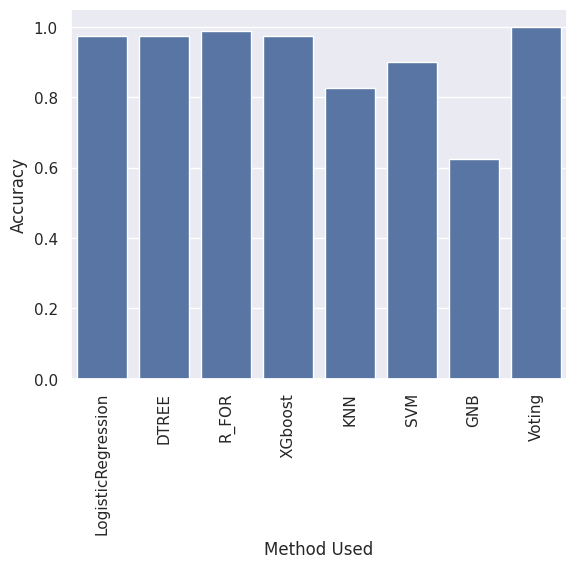

In [118]:
list_met = []
list_accuracy = []
logit = LogisticRegression()
logit = logit.fit(x_train, y_train)
y_pred_lr = logit.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)


#Decision Tree
Dtree = DecisionTreeClassifier()
Dtree = Dtree.fit(x_train, y_train)
y_pred_dt = Dtree.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

#RandomForest
R_for = RandomForestClassifier()
R_for = R_for.fit(x_train, y_train)
y_pred_rf = R_for.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

#XG_boost
xgboost = XGBClassifier()
xgboost = xgboost.fit(x_train, y_train)
y_pred_xg = xgboost.predict(x_test)
accuracy_xg = accuracy_score(y_test, y_pred_xg)


#KNeighborsClassifier
knn = KNeighborsClassifier()
knn = knn.fit(x_train, y_train)
y_pred_kn = knn.predict(x_test)
accuracy_kn = accuracy_score(y_test, y_pred_kn)


#SVM
svm = SVC()
svm = svm.fit(x_train, y_train)
y_pred_sv = svm.predict(x_test)
accuracy_sv = accuracy_score(y_test, y_pred_sv)

#gnb
gnb = GaussianNB()
gnb = gnb.fit(x_train, y_train)
y_pred_gn = gnb.predict(x_test)
accuracy_gn = accuracy_score(y_test, y_pred_gn)




#voting classifier

model_evc = VotingClassifier(estimators = [('logit',logit),('Dtree',Dtree), ('R_for',R_for),('xgboost',xgboost),('knn',knn),('svm',svm),('gnb',gnb)],voting='hard')
model_evc =model_evc.fit(x_train, y_train)
pred_evc = model_evc.predict(x_test)
accuracy_evc = accuracy_score(y_test,pred_evc)


list1= ['LogisticRegression', 'DTREE', 'R_FOR', 'XGboost','KNN', 'SVM', 'GNB','Voting']
list2= [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_xg, accuracy_kn, accuracy_sv, accuracy_gn,accuracy_evc]
list3= [logit, Dtree, R_for, xgboost, knn, svm, gnb,model_evc]


df_accuracy = pd.DataFrame({"Method Used": list1, "Accuracy": list2})

print(df_accuracy)

chart = sns.barplot(x="Method Used", y="Accuracy", data=df_accuracy)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print(chart)

In [119]:
pred_evc_train = model_evc.predict(x_train)
pred_evc_test = model_evc.predict(x_test)
accuracy_evc_train = accuracy_score(y_train, pred_evc_train)
accuracy_evc_test = accuracy_score(y_test, pred_evc_test)

print("**************")
print("Training Accuracy:", accuracy_evc_train)
print("**************")
print("Test Accuracy:", accuracy_evc_test)

**************
Training Accuracy: 1.0
**************
Test Accuracy: 1.0


In [120]:
from sklearn.model_selection import cross_val_score
training = cross_val_score(model_evc, x_train, y_train, cv=10)
print("Training Accuracy:", training.mean())
print("******************")
print("Testb Accuracy:", accuracy_evc_test)

Training Accuracy: 0.984375
******************
Testb Accuracy: 1.0


In [121]:
print("**************")
print("Training Accuracy:", classification_report(y_train, pred_evc_train))
print("**************")
print("Test Accuracy:", classification_report(y_test, pred_evc_test))

**************
Training Accuracy:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       200
           1       1.00      1.00      1.00       120

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320

**************
Test Accuracy:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        30

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [122]:
print("**************")
print("Training Accuracy:", confusion_matrix(y_train, pred_evc_train))
print("**************")
print("Test Accuracy:", confusion_matrix(y_test, pred_evc_test))

**************
Training Accuracy: [[200   0]
 [  0 120]]
**************
Test Accuracy: [[50  0]
 [ 0 30]]
